## Titanic-survival-complete-ml-solution 

#### In this project , I will go through the whole process of creating a machine learning model on the famous **"Titanic dataset"**, which is used by many people all over the world. It provides information on the fate of passengers on the Titanic, summarized according to economic status (class), sex, age and survival.

In [1]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style


In [2]:
# read the date set by using pandas (read.csv())

df_titanic = pd.read_csv(r"C:/Users/HP/Desktop/dataset/titanic.csv")
print(df_titanic.head(10))


   Survived  Pclass                                               Name  \
0         0       3                             Mr. Owen Harris Braund   
1         1       1  Mrs. John Bradley (Florence Briggs Thayer) Cum...   
2         1       3                              Miss. Laina Heikkinen   
3         1       1        Mrs. Jacques Heath (Lily May Peel) Futrelle   
4         0       3                            Mr. William Henry Allen   
5         0       3                                    Mr. James Moran   
6         0       1                             Mr. Timothy J McCarthy   
7         0       3                      Master. Gosta Leonard Palsson   
8         1       3   Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson   
9         1       2                 Mrs. Nicholas (Adele Achem) Nasser   

      Sex   Age  Siblings/Spouses Aboard  Parents/Children Aboard     Fare  
0    male  22.0                        1                        0   7.2500  
1  female  38.0                

In [3]:
## print the columns of the data set 
print("print the all colums in the Titanic dataset :- \n ")
print()
print(df_titanic.columns.values)

print the all colums in the Titanic dataset :- 
 

['Survived' 'Pclass' 'Name' 'Sex' 'Age' 'Siblings/Spouses Aboard'
 'Parents/Children Aboard' 'Fare']


In [4]:
## check the basic information of the dataset 
print("basic information of the dataset :- \n ")
print()
print(df_titanic.info())

basic information of the dataset :- 
 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB
None


#### Here i can check that data set have 8 columns( features) ,the target variable (survived). 2 of the features are floats, 4 are integers and 2 are objects. Below I have listed the features with a short description:

In [5]:
'''
survival:    Survival 
pclass:    Ticket class     
sex:    Gemder of the passanger      
Age:    Age in years od the passanger      
sibsp:    # of siblings / spouses aboard the Titanic     
parch:    # of parents / children aboard the Titanic     
ticket:    Ticket number     
fare:    Passenger fare 

'''
## summary of the data set by using describe function  

print("Lets check the summary of the data set")
print()
print(df_titanic.describe())



Lets check the summary of the data set

         Survived      Pclass         Age  Siblings/Spouses Aboard  \
count  887.000000  887.000000  887.000000               887.000000   
mean     0.385569    2.305524   29.471443                 0.525366   
std      0.487004    0.836662   14.121908                 1.104669   
min      0.000000    1.000000    0.420000                 0.000000   
25%      0.000000    2.000000   20.250000                 0.000000   
50%      0.000000    3.000000   28.000000                 0.000000   
75%      1.000000    3.000000   38.000000                 1.000000   
max      1.000000    3.000000   80.000000                 8.000000   

       Parents/Children Aboard       Fare  
count               887.000000  887.00000  
mean                  0.383315   32.30542  
std                   0.807466   49.78204  
min                   0.000000    0.00000  
25%                   0.000000    7.92500  
50%                   0.000000   14.45420  
75%                  

#### Above we can see that 38% out of the dataset survived the Titanic. We can also see that the passenger ages range from 0.4 to 80 On top we can find out that there in no missing value present in the dataset ,


#### First of all, that we need to convert a lot of features into numeric ones later on, so that the machine learning algorithms can process them. Furthermore, we can see that the features have widely different ranges, that we will need to convert into roughly the same scale

In [6]:
## Let’s take a more detailed look at what data is actually missing 

total = df_titanic.isnull().sum().sort_values(ascending=False)

percent_1 = df_titanic.isnull().sum()/df_titanic.isnull().count()*100

percent_2 = (round(percent_1, 1)).sort_values(ascending=False)

missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])

missing_data.head(8)

,Total,%
Fare,0,0.0
Parents/Children Aboard,0,0.0
Siblings/Spouses Aboard,0,0.0
Age,0,0.0
Sex,0,0.0
Name,0,0.0
Pclass,0,0.0
Survived,0,0.0


In [7]:
### check the missing value of the dataset column wise or total

print(" NaN value in the data set column wise :- \n " , df_titanic.isnull().sum())
print()
print(" Total NaN value in the data set  :- \n " , df_titanic.isnull().sum().sum())

 NaN value in the data set column wise :- 
  Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

 Total NaN value in the data set  :- 
  0


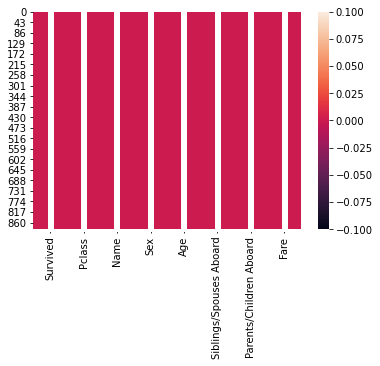

In [8]:
## ## check visualization of the null value using the seaborn library

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df_titanic.isnull(),annot=True)
plt.show()

#### Above you can see the 8 features + the target variable (survived). 

## What features could contribute to a high survival rate ?

## 1. Age and Sex:

Text(0.5, 1.0, 'Male')

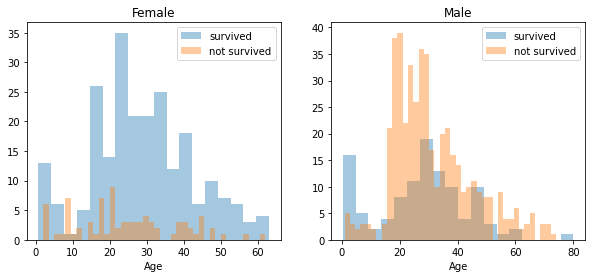

In [9]:
survived = 'survived'
not_survived = 'not survived'

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))

women = df_titanic[df_titanic['Sex']=='female']
men = df_titanic[df_titanic['Sex']=='male']

ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
ax.set_title('Male')

### You can see that men have a high probability of survival when they are between 18 and 30 years old, which is also a little bit true for women but not fully. For women the survival chances are higher between 14 and 40.

### For men the probability of survival is very low between the age of 5 and 18, but that isn’t true for women. Another thing to note is that infants also have a little bit higher probability of survival.

### Since there seem to be certain ages, which have increased odds of survival and because I want every feature to be roughly on the same scale, I will create age groups later on.

## Sex and Survived :

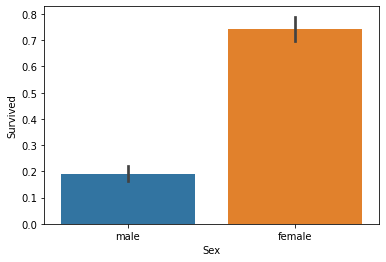

In [10]:
## What is the average age of survived and not survived

sns.barplot(x='Sex', y='Survived', data=df_titanic)
plt.show()

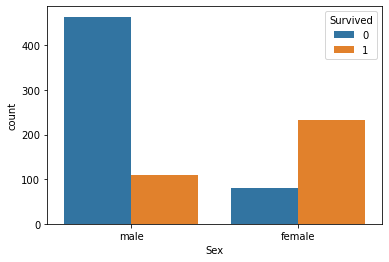

In [11]:
#Lets check the count of male survived vs count of female survived
sns.countplot(x="Sex",hue="Survived",data=df_titanic)
plt.show()
#From below plot it's clear that out of the total number of males very few males survived while on the
#hand most of the females survived

### As we can see that the probability  rate of survival to the woman is greater then man 


##  Pclass and Survived :

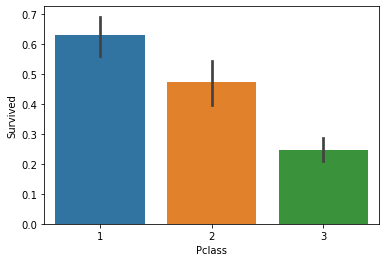

In [12]:
# what was the averge Survived for 1st class 2nd class and 3rd class

sns.barplot(x='Pclass', y='Survived', data=df_titanic)
plt.show()


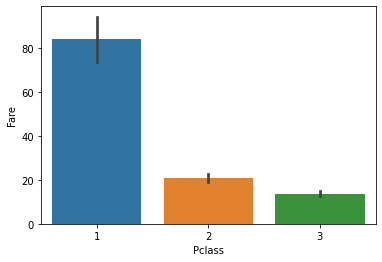

In [13]:
#what was the averge fare price for 1st class 2nd class and 3rd class
sns.barplot(x="Pclass",y="Fare",data=df_titanic)
plt.show()
#fare price for 1st class is far more than 2nd classz and 3 class

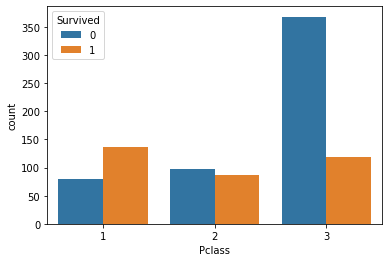

In [14]:
#lets check the number of people who survived and not survived in each class
sns.countplot(x="Pclass",hue="Survived",data=df_titanic)
plt.show()
#From the below graph it is clear that in fisrst class more people survived than dying
#in 2nd class no. of people who survived were less but almost equal to the not survived
#But in 3rd class no. of people who survived were far less than who not survived

### You can see that high class have higher probability of survival , Here we see clearly, that Pclass is contributing to a persons chance of survival, especially if this person is in class 1. We will create another pclass plot below


C:\Users\HP\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


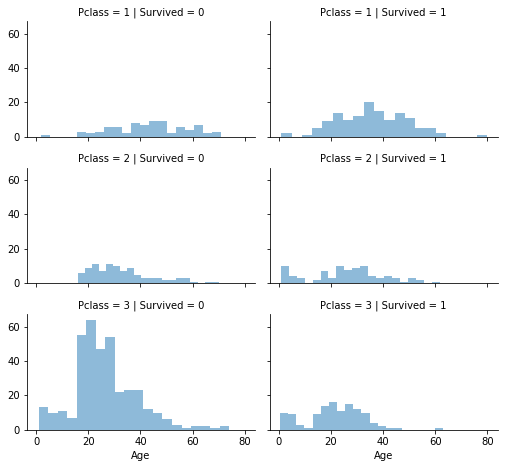

In [15]:
grid = sns.FacetGrid(df_titanic, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

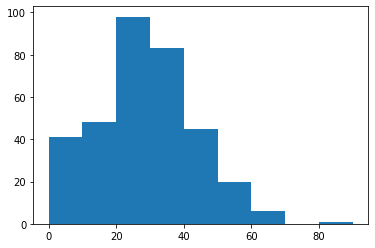

In [16]:
### lets in what age range maximum people survived
plt.hist(x="Age", bins=range(0,100,10), data=df_titanic.loc[df_titanic["Survived"]==1])
plt.show()

In [17]:
## ## The plot above confirms our assumption about pclass 1,
## but we can also spot a high probability that a person in pclass 3 will not survive.

In [18]:
data = [df_titanic]

for dataset in data:
    dataset['relatives'] = dataset['Siblings/Spouses Aboard'] + dataset['Parents/Children Aboard']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)
    
df_titanic['not_alone'].value_counts()

1    533
0    354
Name: not_alone, dtype: int64

In [21]:
df_titanic.columns.values

array(['Survived', 'Pclass', 'Name', 'Sex', 'Age',
       'Siblings/Spouses Aboard', 'Parents/Children Aboard', 'Fare',
       'relatives', 'not_alone'], dtype=object)

In [23]:
## let's check whether there are outliers present or not 

from scipy.stats import zscore
df1 = df_titanic[["Fare","Survived","Pclass","Age","Siblings/Spouses Aboard","Parents/Children Aboard","relatives"]]

z = abs(zscore(df1)) ## it take only numarical value (int, float) , str not take 

print("orignal data set shape :- ", df1.shape)

df_titanic_final = df1.loc[(z<3).all(axis = 1)]
print()
print( "fillter dataset shape :- ", df_titanic_final.shape)


orignal data set shape :-  (887, 7)

fillter dataset shape :-  (821, 7)


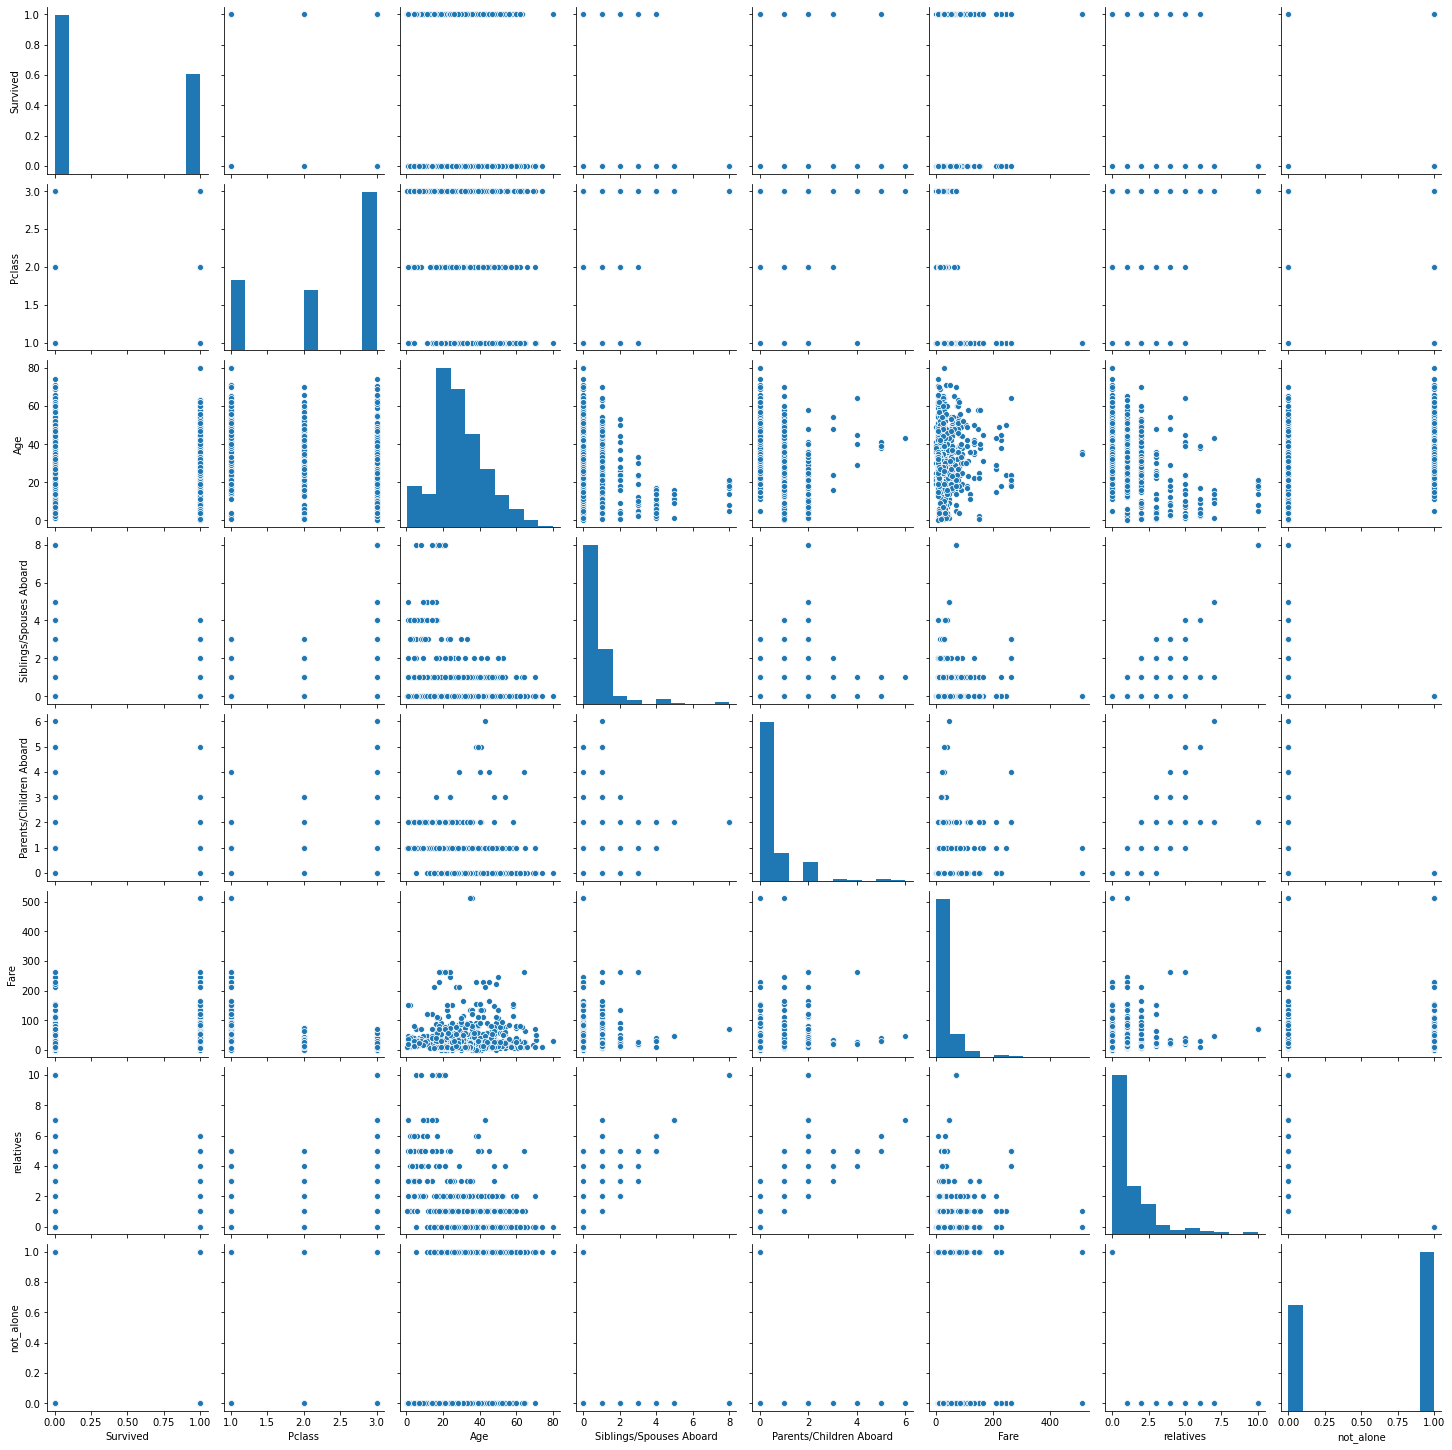

In [25]:
#lets check pairplot using seaborn library
sns.pairplot(data=df_titanic)
plt.show()

In [24]:
#lets check skewnesss of the dataset
df_titanic.skew()
#Below shows acceptable level of skewness (-.55 to +.55 )

Survived                   0.470999
Pclass                    -0.623409
Age                        0.447189
Siblings/Spouses Aboard    3.686760
Parents/Children Aboard    2.741198
Fare                       4.777671
relatives                  2.720340
not_alone                 -0.412784
dtype: float64

In [28]:
#Treating the skewnesss using log
import numpy as np
for col in df1:
    if df1.skew().loc[col]>0.55:
        df1[col]=np.log1p(df1[col])

<ipython-input-28-6d4b79faca15>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col]=np.log1p(df1[col])


In [29]:
#lets again check the skewness
df1.skew()

Fare                       0.388398
Survived                   0.470999
Pclass                    -0.623409
Age                        0.447189
Siblings/Spouses Aboard    1.654468
Parents/Children Aboard    1.668365
relatives                  1.177431
dtype: float64

In [33]:
#Now let seprate input and output variable to be used for the linear regression problem
X = df1.drop("Survived", axis = 1)
Y = df1["Survived"]

print(X.head())
print(Y.head())

print(X.shape, Y.shape)

       Fare  Pclass   Age  Siblings/Spouses Aboard  Parents/Children Aboard  \
0  2.110213       3  22.0                 0.693147                      0.0   
1  4.280593       1  38.0                 0.693147                      0.0   
2  2.188856       3  26.0                 0.000000                      0.0   
3  3.990834       1  35.0                 0.693147                      0.0   
4  2.202765       3  35.0                 0.000000                      0.0   

   relatives  
0   0.693147  
1   0.693147  
2   0.000000  
3   0.693147  
4   0.000000  
0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64
(887, 6) (887,)


In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model
max_r_score = 0
for r_state in range (0 , 101):
    x_train,x_test,y_train,y_test = train_test_split(X , Y , random_state = r_state , test_size = 0.20 ) ## split the data set 
    regr = linear_model.LogisticRegression() #  use the Logistic regression model 
    regr.fit(x_train,y_train) # train and test data set fit in the model 
    y_pred = regr.predict(x_test)
    r2_scr = r2_score(y_test,y_pred)
    print("r2_score corresponding to random state: ",r_state," is: ",r2_scr)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print()
print()
print("max r2 score corresponding to ",final_r_state," is ",max_r_score)

r2_score corresponding to random state:  0  is:  -0.27196300966792797
r2_score corresponding to random state:  1  is:  -0.39937106918238996
r2_score corresponding to random state:  2  is:  -0.2886665789127285
r2_score corresponding to random state:  3  is:  -0.3571136827773995
r2_score corresponding to random state:  4  is:  -0.09737985147821226
r2_score corresponding to random state:  5  is:  -0.05311281430684378
r2_score corresponding to random state:  6  is:  -0.38021390374331565
r2_score corresponding to random state:  7  is:  -0.2886665789127285
r2_score corresponding to random state:  8  is:  -0.4040106951871658
r2_score corresponding to random state:  9  is:  -0.17151507173884406
r2_score corresponding to random state:  10  is:  -0.1558441558441559
r2_score corresponding to random state:  11  is:  -0.007502961695406096
r2_score corresponding to random state:  12  is:  -0.3414760914760915
r2_score corresponding to random state:  13  is:  -0.30168860523866514
r2_score correspondin

In [36]:
#Lets do the cross validation
from sklearn.model_selection import cross_val_score
cross_val_score(linear_model.LogisticRegression(), X, Y, cv=10,scoring="r2").mean()
#the Below cross validation score is less and it shows that we further need to improve our model using more data

-0.22284242990125355

In [37]:
#since maximum is comming around random state 10  will use that to create our final model
x_train, x_test, y_train, y_test = train_test_split(X, Y,random_state = 91,test_size=0.20)
lr=linear_model.LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

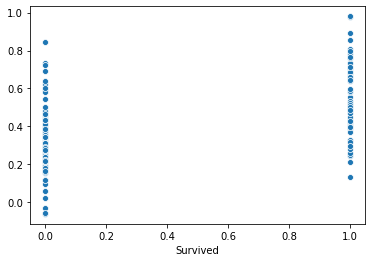

In [38]:
sns.scatterplot(x=y_test , y=y_pred )

In [39]:
#Lets evaluate RMSE and r2 score using sklearn library
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np
print("r2 score is: ",r2_score(y_test,y_pred))
print("RMSE is : ",np.sqrt(mean_squared_error(y_test,y_pred)))

r2 score is:  0.2566423059066517
RMSE is :  0.40920107553983626


In [43]:
from sklearn.metrics import confusion_matrix #for confusion matrix
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import Perceptron


acc_log = round( regr.score(X, Y) * 100, 2)
print("acc_log :- ", acc_log )


acc_log :-  71.59
